# Stability Analysis for Pahoehoe to a'a project

### When coupled with utils.py, this notebook graphs the stability results of the Linear Stability Analysis first introduced in Yih 1967 https://doi.org/10.1017/jfm.2017.418. 

#### For verification purposes, copy and paste the following into the notebook cell below:
```
from utils import *
N_POINTS = 2500
params = {"g" : 1, "d1" : 1, "d2" : 2, "d2s" : [1.25, 2.5, 5, 10], "mu1" : 1, "mu2" : .8, "mu2s" : np.linspace(1.001, 100, N_POINTS), "rho1" : 1, "rho2" : 1, "U0" : 1, "dP" : 0, "verbose" : False, "colors_red" : [ "#fdecdd", "#fdbe85", "#fd8d3c", "#d94701"], "colors_blue":  ["#eef0fe", "#bdd7e7", "#6baed6", "#2171b5"],
}
plot_stability_graph(**params)

```
#### The graph generated should match that of Figure 2(b) in https://doi.org/10.1017/jfm.2017.418. 

# Notebook Use: 
#### Full instructions can be found in the readme. The graphing functions ```plot_stability_graph()``` and ```plot_vel_profile()``` rely on the construction of the ```params``` dictionary with specially named variables. The presence of ranged values for mu2, rho2, and dP within ```params``` results in the graphing of the stability over that variable, using the other parameters declared. 

#### ```params``` can validly contain both ```"mu2"``` and ```"mu2s"``` at the same time. When graphing stability over velocity difference, values from  ```"mu2s"``` will be used. However, if stability is graphed over density or pressure differences, the value ```"mu2"``` and ```"mu1"``` will be used to calculate a single ```"m"``` used for all points of the graph. 

## Realistic ranges of parameters

### Density: Top layer 0-10% less dense (likely an overestimate, closer to 3%), informed by Aubele 1988

### Viscosity: Could be up to 5 orders of magnitude difference between upper layer and lower layer

### Height: test very thin bottom, very thin top, equal sizes

### A1: not a good sense of what this could be 

In [1]:
from utils import *
N_POINTS = 5000

def params_dict():
        return {
        "g" : 1,

        "d1" : 1,
        "d2" : 2,
        "d2s" : [.5, .75,1.25, 2],

        "mu1" : 1,
        "mu2" : .8,
        "mu2s" : np.linspace(0.00001, .999, N_POINTS),

        "rho1" : 1,
        "rho2" : 1,
        "rho2s" : np.linspace(1, 100, N_POINTS),

        "U0" : 1,
        "dP" : 0, # K value
        "dPs" : np.linspace(0, 1000, N_POINTS),
        "verbose" : False,

        "colors_red" : ["#f4a582", "#ca0020"],
        "colors_blue":  ["#92c5de", "#0571b0"],
        "color_one" : "#dfdfaf",

        "N_POINTS" : N_POINTS,

        "legends" : (1, 1, 1),

        "viscosity_lim" : None,
        "density_lim" : None,
        "pressure_lim" : None,

        "title_size" : 12,
        "label_size" : 12, 

        "stability_figsize" : (8,4),
        "velocity_figsize" : (8,4)
    }

def plot_both(params):
    plot_stability_graph(**params)
    plot_vel_profile(**params)
    

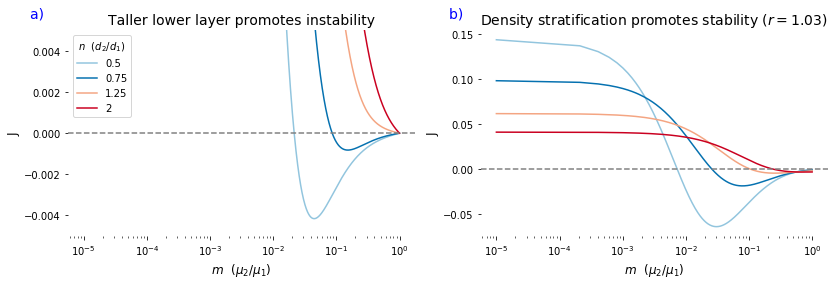

In [2]:
# panel for generating the first figure 

params = params_dict()

def first_process(params):
    params["dP"] = 0
    params["dPs"] = None
    params["rho2s"] = None

    params["mu2s"] = np.linspace(.01, .999, N_POINTS)
    params["viscosity_lim"] = (-.005, .005)

    params["visc_title"] = "Taller lower layer promotes instability"
    params["title_size"] = 14

# Set params for left plot
first_process(params)
params["mu2s"] = np.linspace(.00001, .999, N_POINTS)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

plot_stability_graph(ax1, **params)

# Set params for right plot
params["viscosity_lim"] = None
params["rho1"] = .97
r = round(params["rho2"] / params["rho1"], 2)
params["visc_title"] = f"Density stratification promotes stability ($r = {r}$)"
params["legends"] = (0,0,0)

plot_stability_graph(ax2, **params)

DIST = 180
fig.suptitle("a)" + " " * int(DIST / 2) + "b)" + " " * int(DIST / 2.2), color="blue", fontsize=14)

filename = "images/paper_combo_basic_dens_full_mu2"
plt.tight_layout()
#fig.savefig(filename)

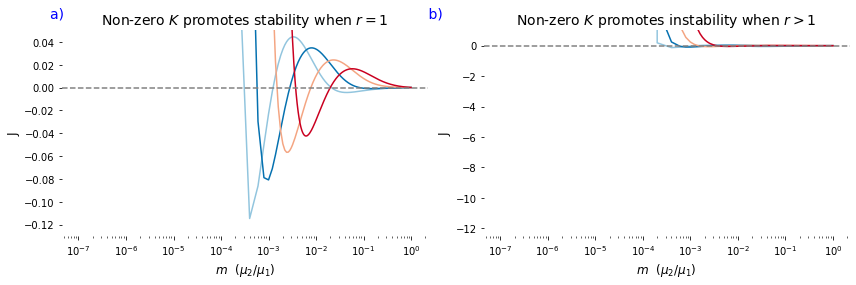

In [3]:
# Look at velocity results, where things begin to become unstable
# figure 3, influence of differential pressure on stability

params = params_dict()
first_process(params)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

params["mu2s"] = np.linspace(.0000001, .999, N_POINTS)
# params["visc_title"] = "$K = 0$ , density strat"
# params["viscosity_lim"] = (-.005, .005)
# params["x_label"] = ""
# plot_stability_graph(ax3, **params)

params["legends"] = (0,0,0)

mu2s = params["mu2s"]
#params["mu2s"] = np.linspace(mu2s[0], mu2s[-1], N_POINTS * 5)

params["dP"] = .01
params["viscosity_lim"] = (-.13, .05)
params["visc_title"] = "Non-zero $K$ promotes stability when $r = 1$"
plot_stability_graph(ax1, **params)


params["rho1"] = .97
params["viscosity_lim"] = (-12.5,1)
params["visc_title"] = "Non-zero $K$ promotes instability when $r > 1$"
plot_stability_graph(ax2, **params)

DIST = 180
fig.suptitle("a)" + " " * int(DIST / 2.2) + "b)" + " " * int(DIST / 2.2), color="blue", fontsize=14)
plt.tight_layout()
#fig.savefig("images/paper_dpdx_limited_mu")

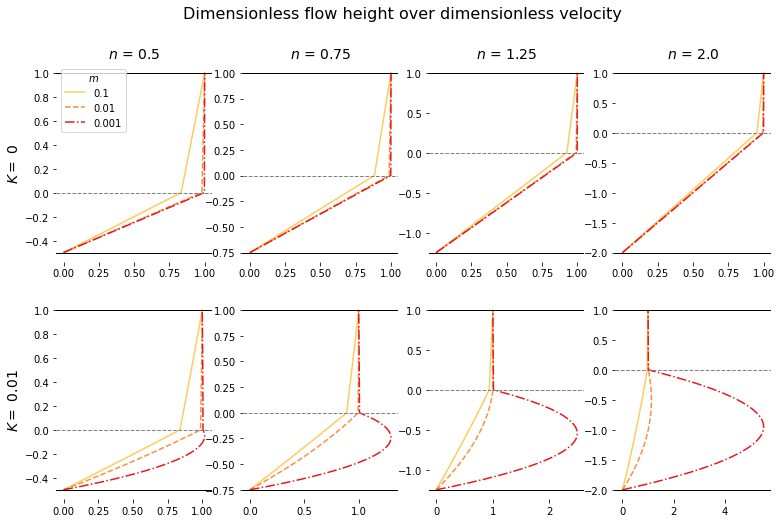

In [4]:
# This is pretty cool, we can tie in relative internal velocities to instability
from itertools import cycle
def vel_profile_matrix(dPs, d2s, mu2s, params):
    fig, axes = plt.subplots(len(dPs), len(d2s), figsize=(len(d2s) * 3.2, len(dPs) * 4))
    
    for dP in dPs:
        params["dP"] = dP
        for d2 in d2s:
            params["legend"] = (not d2s.index(d2) and not dPs.index(dP))
            params["d2"] = d2
            params["mu2s"] = mu2s
            params["vel_title"] = ""
            params["y_label"] = None

            if not d2s.index(d2):
                params["y_label"] = f"$K =$ {dP}"

            if not dPs.index(dP):
                params["vel_title"] = f"$n$ = {d2 / params['d1']}"

            plot_vel_profile(axes[dPs.index(dP)][d2s.index(d2)], **params)
            
    if "fig_title" in params and params["fig_title"]:
        fig.suptitle(params["fig_title"], fontsize=16)
    if "save" in params and params["save"]:
        fig.savefig(params["save"])
    

dPs = [0, .01]
d2s = [.5, .75, 1.25, 2]
mu2s = [.1, .01, .001]
params = params_dict()
params["fig_title"] = "Dimensionless flow height over dimensionless velocity"
params["title_size"] = 14
params["label_size"] = 14

#params["save"] = "images/paper_vel_profile_matrix"
params["vel_colors"] = ["#fecc5c", "#fd8d3c", "#e31a1c"]
vel_profile_matrix(dPs, d2s, mu2s, params)

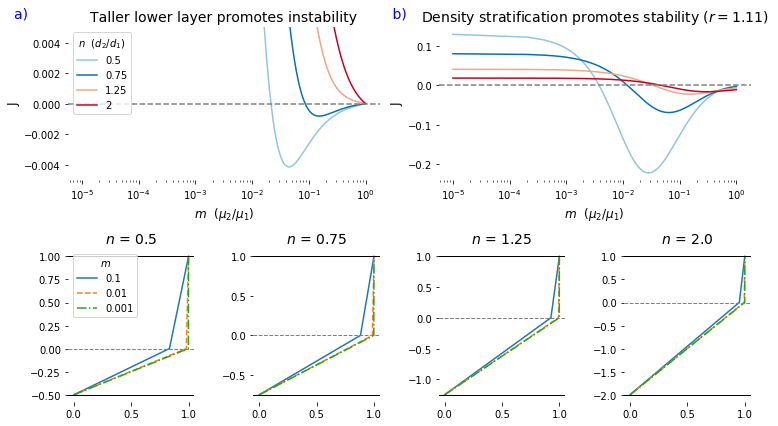

In [5]:
# make combined figure 1

# Set up array of figures
fig = plt.figure(figsize=(11, 6))
ax1 = plt.subplot(2, 4, (1, 2))
ax2 = plt.subplot(2, 4, (3, 4))

ax3 = plt.subplot(2, 4, 5)
ax4 = plt.subplot(2, 4, 6)
ax5 = plt.subplot(2, 4, 7)
ax6 = plt.subplot(2, 4, 8)

vel_profiles = (ax3, ax4, ax5, ax6)

# create the graphing parameters
params = params_dict()
def first_process(params):
    params["dP"] = 0
    params["dPs"] = None
    params["rho2s"] = None

    params["mu2s"] = np.linspace(.01, .999, N_POINTS)
    params["viscosity_lim"] = (-.005, .005)

    params["visc_title"] = "Taller lower layer promotes instability"
    params["title_size"] = 14

# Set params for left plot
first_process(params)
params["mu2s"] = np.linspace(.00001, .999, N_POINTS)
plot_stability_graph(ax1, **params)

# Set params for right plot
params["viscosity_lim"] = None
params["rho1"] = .9
r = round(params["rho2"] / params["rho1"], 2)
params["visc_title"] = f"Density stratification promotes stability ($r = {r}$)"
params["legends"] = (0,0,0)

plot_stability_graph(ax2, **params)

# super label as (a) and (b) 
DIST = 180
fig.suptitle("a)" + " " * int(DIST / 2.2) + "b)" + " " * int(DIST / 2.2), color="blue", fontsize=14)

# handle velocity profiles
d2s = [.5, .75, 1.25, 2]
params["mu2s"] = [.1, .01, .001]

for i in range(len(vel_profiles)):
    ax = vel_profiles[i]
    params["d2"] = d2s[i]
    params["legend"] = (not d2s.index(params["d2"]))
    params["vel_title"] = f"$n$ = {params['d2'] / params['d1']}"
    params["y_label"] = None
    plot_vel_profile(ax, **params)


filename = "images/paper_dens_vel_profile"
plt.tight_layout()
fig.savefig(filename)

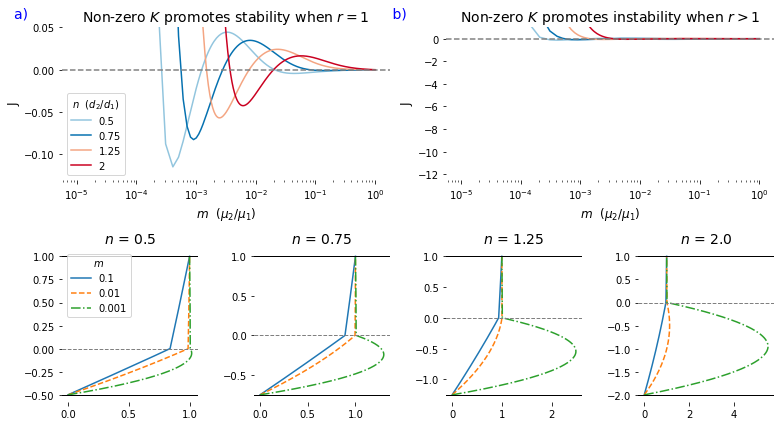

In [6]:
# make combined figure 2
# Set up array of figures
fig = plt.figure(figsize=(11, 6))
ax1 = plt.subplot(2, 4, (1, 2))
ax2 = plt.subplot(2, 4, (3, 4))

ax3 = plt.subplot(2, 4, 5)
ax4 = plt.subplot(2, 4, 6)
ax5 = plt.subplot(2, 4, 7)
ax6 = plt.subplot(2, 4, 8)

vel_profiles = (ax3, ax4, ax5, ax6)

# create the graphing parameters
params = params_dict()
# Set params for left plot

first_process(params)
N_POINTS *= 2
params["mu2s"] = np.linspace(.00001, .999, N_POINTS)
params["dP"] = .01
params["viscosity_lim"] = (-.13, .05)
params["visc_title"] = "Non-zero $K$ promotes stability when $r = 1$"
plot_stability_graph(ax1, **params)


params["rho1"] = .97
params["viscosity_lim"] = (-12.5,1)
params["visc_title"] = "Non-zero $K$ promotes instability when $r > 1$"
params["legends"] = (0,0,0)
plot_stability_graph(ax2, **params)

# super label as (a) and (b) 
DIST = 180
fig.suptitle("a)" + " " * int(DIST / 2.2) + "b)" + " " * int(DIST / 2.2), color="blue", fontsize=14)

# handle velocity profiles
d2s = [.5, .75, 1.25, 2]
params["mu2s"] = [.1, .01, .001]

for i in range(len(vel_profiles)):
    ax = vel_profiles[i]
    params["d2"] = d2s[i]
    params["legend"] = (not d2s.index(params["d2"]))
    params["vel_title"] = f"$n$ = {params['d2'] / params['d1']}"
    params["y_label"] = None
    plot_vel_profile(ax, **params)


filename = "images/paper_dpdx_vel_profile"
plt.tight_layout()
#fig.savefig(filename)

In [7]:
from utils import *
def dissected_yihJ(**params):
    """ 
    Calculates J, equation (42) in Yih 1967.
    """ 
    # set up constants
    rho2, rho1, mu2, mu1, d2, d1, g, K, U0, verbose = \
        (params["rho2"], params["rho1"], params["mu2"], 
             params["mu1"], params["d2"], params["d1"], 
                 params["g"], params["dP"], params["U0"], params["verbose"])
    
    r = rho2 / rho1
    m = mu2 / mu1
    n = d2 / d1

    args = (r, m, n, g, K, U0) 

    cache = False
    if "cache" in params:
        cache = True
   
    if cache and args in params["cache"]:
        cache = False
        return params["cache"]
    
    A2 = -(0.5 * K * U0) / mu2 * d1**2
    A1 = m * A2 

    a2 = (1 + (A2 * ((n ** 2) - m))) / (m + n)
    a1 = m * a2

    b = ((1 - A1 * (1 + n)) * n) / (m + n)

    # First alpha = 0 approx
    B1 = -((m + (3 * n ** 2) + (4 * n ** 3))/(2 * n ** 2 * (1 + n)))
    B2 = 2 * (m + (n ** 3))/(m * n) + (((n ** 2) * B1) / m)

    C2 = (m + n ** 3)/((m * n ** 2) * (1 + n))
    C1 = m * C2

    D2 = ((n ** 2) - m) / ((2 * m * n ** 2) * (1 + n))
    D1 = m * D2

    # this is for solution of upper boundary
    c_0p = (a2 - a1) / (B1 - B2)

    def h1(y):
        return (A1 * D1 * y ** 7) / 210 + \
            (a1 * D1 * y ** 6) / 60 + \
            ((a1 * C1 - (3 * c_0p * D1) - A1 * B1) * y ** 5) / 60 -\
            ((c_0p * C1 + A1) * (y ** 4) / 12)

    def h2(y):
        return (A2 * D2 * y ** 7) / 210 + \
            (a2 * D2 * y ** 6) / 60 + \
            ((a2 * C2 - 3 * c_0p * D2 - A2 * B2) * y ** 5) / 60 -\
            ((c_0p * C2 + A2) * (y ** 4) / 12)

    def h1p(y):
        return (A1 * D1 * y ** 6) / 30 + \
            (a1 * D1 * y ** 5) / 10 + \
            ((a1 * C1 - 3 * c_0p * D1 - A1 * B1) * y ** 4) / 12 -\
            ((c_0p * C1 + A1) * (y ** 3) / 3)

    def h2p(y):
        return (A2 * D2 * y ** 6) / 30 + \
            (a2 * D2 * y ** 5) / 10 + \
            ((a2 * C2 - 3 * c_0p * D2 - A2 * B2) * y ** 4) / 12 -\
            ((c_0p * C2 + A2) * (y ** 3) / 3)

    F2 = ((rho2 - rho1) / rho1) * (g * d1 / (U0 ** 2))
    print(f"F2={F2}",end=" ")

    h_1 = h1(1)
    h_1p = h1p(1)
    h_2 = h2(-n)
    h_2p = h2p(-n)
    
#     if r == 1:
#         H2 = r * h_2 
#         J2 = r * h_2p 
#     else:
    H2 = r * h_2 - ((n ** 3) / 6) * ((1 / ((c_0p))) * F2) -(((r - 1) * (c_0p * B1 + a1)))
    J2 = r * h_2p + (((n ** 2) / 2)) * ((1 / ((c_0p))) * F2) - (((r - 1) * (c_0p * B1 + a1)))
    
    
    J = (((1 / m) * (c_0p ** 2)) / (a1 - a2)) * \
    (m * (h_1p - 2 * h_1) - J2 - ((2 / n) * H2) + \
     (((m - n ** 2)/(2 * (1 + n))) * (h_1 - h_1p - (J2 / n) - (H2 / n ** 2))))
    math
    if verbose:
        print('c_0p',c_0p)
        print(f'h_1: {h_1}, h_1p: {h_1p}, h_2: {h_2}, h2_p: {h_2p}')
        print(f'H2: {H2}, J2: {J2}')
        print('first term of J', (((1 / m) * (c_0p ** 2)) / (a1 - a2)))
        print('second term of J', (m * (h_1p - 2 * h_1) - J2 - ((2 / n) * H2) + (((m - n ** 2)/(2* (1 + n))) * (h_1 - h_1p - (J2 / n) - (H2 / n ** 2)))))
        print('J', J)
        print()

    if cache:
        params["cache"][args] = J

    return J
params = params_dict()
def print_params(**params):
    n = params["d2"] / params["d1"]
    r = params["rho2"] / params["rho1"]
    m = params["mu2"] / params["mu1"]
    print(f"n={n}, r={r}, m={m}")
    
print_params(**params)
print(yihJ(**params))
print(dissected_yihJ(**params))
params["rho1"] = .999
print_params(**params)
print(dissected_yihJ(**params))

n=2.0, r=1.0, m=0.8
0.0003604022934697628
F2=0.0 0.0003604022934697628
n=2.0, r=1.001001001001001, m=0.8
F2=0.0010010010010010019 0.0002470577782108513


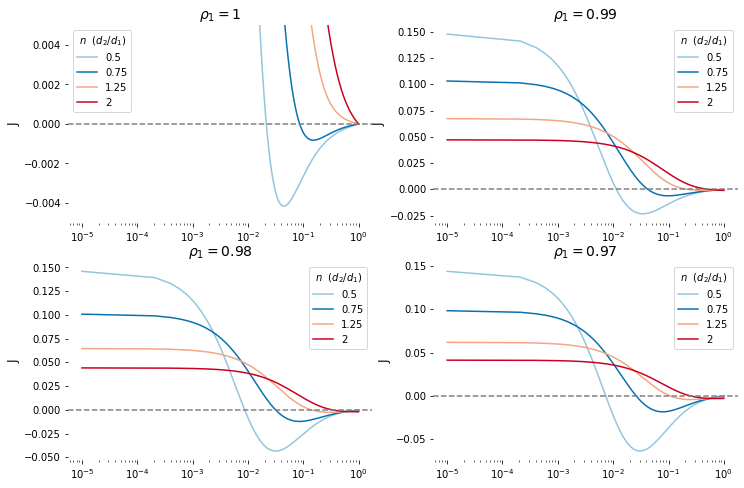

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))
params = params_dict()
axes = (ax1, ax2, ax3, ax4)
N_POINTS = 5000
def first_process(params):
    params["dP"] = 0
    params["dPs"] = None
    params["rho2s"] = None

    #params["mu2s"] = np.linspace(.01, .999, N_POINTS)
    params["viscosity_lim"] = (-.005, .005)

    params["visc_title"] = "Taller lower layer promotes instability"
    params["title_size"] = 14

# Set params for left plot

first_process(params)
params["mu2s"] = np.linspace(.00001, .999, N_POINTS)
#params["d2s"] = [10]

rho1s = [1, .99, .98, .97]
for i in range(len(axes)):
    ax = axes[i]
    params["rho1"] = rho1s[i]
    params["x_label"] = ""
    params["visc_title"] = f"$\u03C1_1 = {round(params['rho1'], 4)}$"
    plot_stability_graph(ax, **params)
    params["viscosity_lim"] = None
fig.savefig("images/density_works")

In [2]:
# for different heights we want to randomly sample values of $m$, $r$
# TODO, make ax a valid parameter
from scipy.stats import beta
def random_sample(n_samples, dist, args, var, ax=None, verbose=False):
    if dist == "beta":
        a, b, spread, start = args
        xs = np.linspace(0, 1, 1000)
        
        if verbose:
            plt.figure() 
            plt.plot(xs, beta.pdf(xs, a, b))

            end = str(start + spread)
            plt.xticks(np.arange(2), ("1", f"{end}"))
            plt.yticks([])
            plt.title(f"PDF over which {var} is being sampled")
        
        return (np.random.beta(a, b, size=(n_samples)) * spread) + start
        
    
        

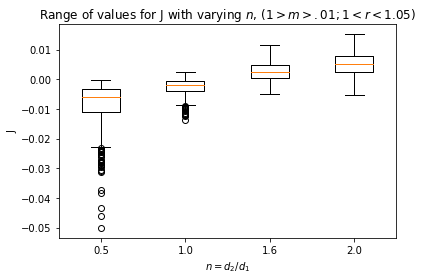

In [3]:
N_SAMPLES = 1000
MU1_MAX = 10
RHO1_MIN = .95

rho1s = random_sample(N_SAMPLES, "beta", (1, 3, -1 + RHO1_MIN, 1), "rho_1")
mu1s = random_sample(N_SAMPLES, "beta", (3, 4, MU1_MAX - 1, 1), "mu_2")

params = {}
params["dP"] = 0 
params["g"] = 1
params["U0"] = 1
params["rho2"] = 1
params["d1"] = 1
params["mu2"] = 1
params["verbose"] = False

d2s = [.5, 1, 1.6, 2]
data_points = {}

for d2 in d2s:
    data_points[d2] = []
    params["d2"] = d2
    for rho1, mu1 in zip(rho1s, mu1s):
        params["rho1"] = rho1
        params["mu1"] = mu1
        data_points[d2].append(yihJ(**params))
        
fig = plt.figure()
data = [vals for key, vals in data_points.items()]
labels = [str(key / 1) for key in data_points.keys()]

plt.boxplot(data, labels=labels)
plt.title("Range of values for J with varying $n$, ($1 > m > .01; 1 < r < 1.05$)")
plt.xlabel("$n = d_2 / d_1$")
plt.ylabel("J")
plt.tight_layout()
fig.savefig("box_plot_random_sampling")

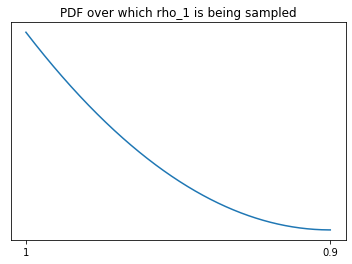

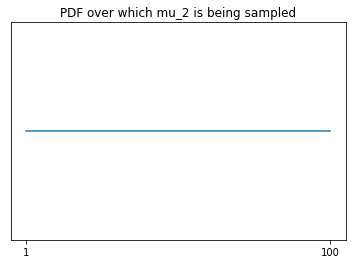

In [4]:
# the average n value for field data was .5889 for Duraiswami, .64 for Aubele

N_SAMPLES = 100000
MU1_MAX = 100
RHO1_MIN = .90

# There may be too many unrealistic values of n here, we could get average

# I actually don't think is right 

params = {}
params["dP"] = 0 
params["g"] = 1
params["U0"] = 1
params["rho2"] = 1
params["d1"] = 1
params["mu2"] = 1
params["verbose"] = False

stable_d2s = []
rho1s = random_sample(N_SAMPLES, "beta", (1, 3, -1 + RHO1_MIN, 1), "rho_1", verbose=True)
mu1s = random_sample(N_SAMPLES, "beta", (1, 1, MU1_MAX - 1, 1), "mu_2", verbose=True)

tens = np.ones(N_SAMPLES) * 10
pows = np.random.randn(N_SAMPLES) * .23

d2s = tens ** pows

for rho1, mu1, d2 in zip(rho1s, mu1s, d2s):
    params["rho1"] = rho1
    params["mu1"] = mu1
    params["d2"] = d2
    if d2 < .1: continue
    if yihJ(**params) <= 0:
        stable_d2s.append(d2)
        


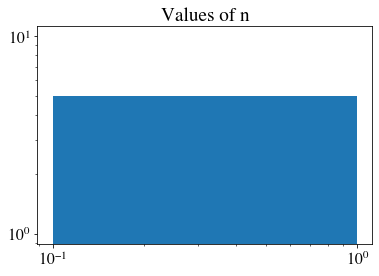

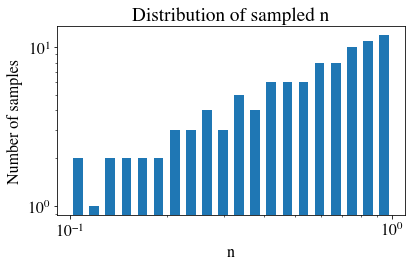

In [66]:
parameters = {'font.sans-serif': 'Times', 'font.size': 16.0, }
plt.rcParams.update(parameters)
plt.figure()
hist, bins, _ = plt.hist(d2s, bins=20, log=True)
plt.title("Values of n")
plt.xscale("log")

logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.figure()
hist, bins, _ = plt.hist(d2s, bins=logbins, log=True, rwidth=.6)
plt.title("Distribution of sampled n")
plt.ylabel("Number of samples")
plt.xlabel("n")
plt.xscale("log")
plt.tight_layout()
plt.savefig("sampled_n_distribution")

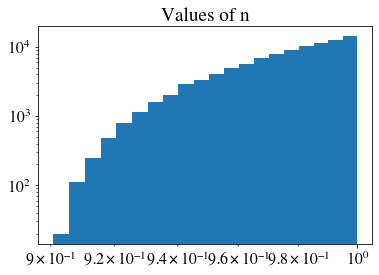

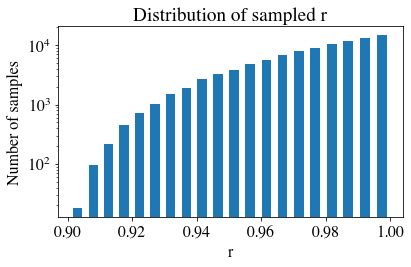

In [39]:
parameters = {'font.sans-serif': 'Times', 'font.size': 16.0, }
plt.rcParams.update(parameters)
plt.figure()
hist, bins, _ = plt.hist(rho1s, bins=20, log=True)
plt.title("Values of n")
plt.xscale("log")

logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.figure()
hist, bins, _ = plt.hist(rho1s, bins=logbins, log=True, rwidth=.6)
plt.title("Distribution of sampled r")
plt.ylabel("Number of samples")
plt.xlabel("r")
#plt.xscale("log")
plt.tight_layout()
plt.savefig("sampled_r_distribution")

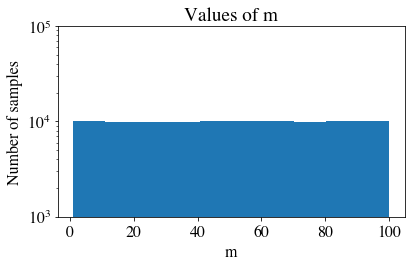

In [46]:
parameters = {'font.sans-serif': 'Times', 'font.size': 16.0, }
plt.rcParams.update(parameters)
plt.figure()
hist, bins, _ = plt.hist(mu1s, bins=10, log=True)
plt.title("Values of m")

plt.ylabel("Number of samples")
plt.xlabel("m")
plt.ylim((10e2, 10e4))

plt.tight_layout()
plt.savefig("sampled_m_distribution")

Only 28307 out of 100000 were stable


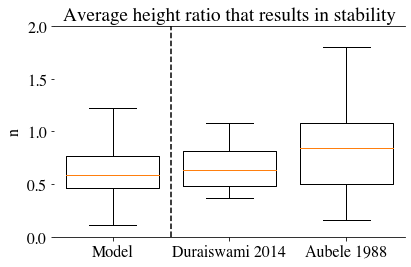

In [37]:
print(f"Only {len(stable_d2s)} out of {N_SAMPLES} were stable")

duraiswami_data = [0.3636363636, 0.8571428571, 1.083333333, 0.6356589147, 0.7741935484, 0.5, 0.4583333333]
aubele_data = [1.142857143, 1.346153846, 1,  0.5217391304, 1.076923077, 0.7777777778, 0.5, 0.5, 1.055555556, 0.6363636364, 0.6, 1.8, 0.4736842105, 0.1612903226, 0.2272727273, 1.294117647, 0.4, 2.12, 0.4347826087, 2.222222222, 0.4285714286, 1, 0.8, 0.5, 0.875, 1.071428571, 1.176470588, 0.8947368421, 0.8461538462]

fig, ax = plt.subplots(figsize=(6,4))
parameters = {'font.sans-serif': 'Times', 'font.size': 16.0, }
plt.rcParams.update(parameters)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)


labels=["Model", "Duraiswami 2014", "Aubele 1988"]
ax.boxplot((stable_d2s, duraiswami_data, aubele_data), labels=labels,
                showfliers=False, widths=.8)
ax.set_title("Average height ratio that results in stability")
ax.set_ylabel("n")
ax.set_ylim((0, 2))
ax.axvline(1.5, color='black', linestyle='--')
plt.tight_layout()
fig.savefig("box_model_comp_field_density")

In [9]:
N_SAMPLES = 1000
N_MIN = .1
N_MAX = .999

N_MIN2 = 1
N_MAX2 = 1.2

M_MIN = 1.01
M_MAX = 20

params = {
    "g" : 1,
    "U0": 1,
    "dP" : 0,
    
    "verbose" : False,
    
    "mu2" : 1,
    "rho1" : .95,
    "rho2" : 1,
    "d1" : 1
}

d2s = np.linspace(N_MIN, N_MAX, N_SAMPLES)
mu1s = np.linspace(M_MAX, M_MIN, N_SAMPLES) 

right_d2s = np.linspace(N_MIN2, N_MAX2, N_SAMPLES)

d2s = np.concatenate([d2s, right_d2s])

results = np.empty((N_SAMPLES, 2 * N_SAMPLES))

for i, d2 in enumerate(d2s):
    for j, mu1 in enumerate(mu1s):
        params["d2"] = d2
        params["mu1"] = mu1
        results[j, i] = yihJ(**params)


['20.0', '15.0', '11.0', '6.0', '1.0']


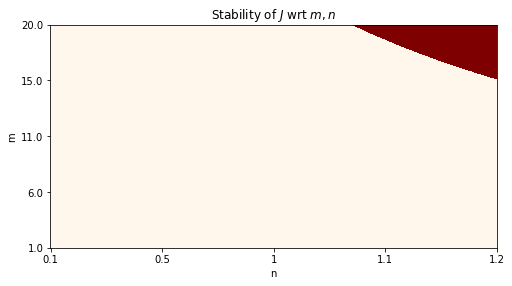

In [10]:
NUM_LABELS_Y = 5
NUM_LABELS_X = 5

locs_y = np.linspace(0, N_SAMPLES, NUM_LABELS_Y)
locs_x = np.linspace(0, 2 * N_SAMPLES, NUM_LABELS_X)

y_labels = [str(round(i, 0)) for i in np.linspace(M_MAX, M_MIN, NUM_LABELS_Y)]

x_labels = [0.1, 0.5, 1, 1.1, 1.2]

modified_results = np.copy(results)

modified_results[modified_results > 0] = 1
modified_results[modified_results < 0] = 0

print(y_labels)

# print(results)

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(modified_results, cmap="OrRd", interpolation="nearest")

ax.set_xticks(locs_x)
ax.set_yticks(locs_y)

ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)

ax.set_xlabel("n")
ax.set_ylabel("m")

ax.set_title("Stability of $J$ wrt $m, n$")

plt.savefig("phase_diagram_unequal_dens")